Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [4]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("twitter_training.csv", header=None, names=['ID', 'Game', 'Sentiment', 'Text'])

In [8]:
df.head()

,ID,Game,Sentiment,Text,SentimentScore
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,-0.6908
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,-0.6908
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,-0.6908
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,-0.6908
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,-0.6908


In [7]:
# Analyze sentiment using NLTK
sid = SentimentIntensityAnalyzer()
df['SentimentScore'] = df['Text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

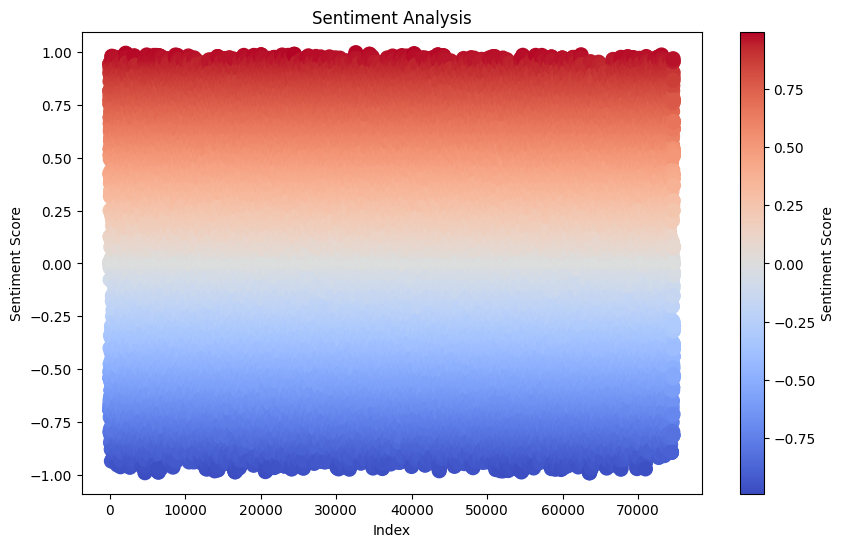

In [9]:
# Visualize sentiment scores
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['SentimentScore'], c=df['SentimentScore'], cmap='coolwarm', s=100)
plt.title('Sentiment Analysis')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.colorbar(label='Sentiment Score')
plt.show()

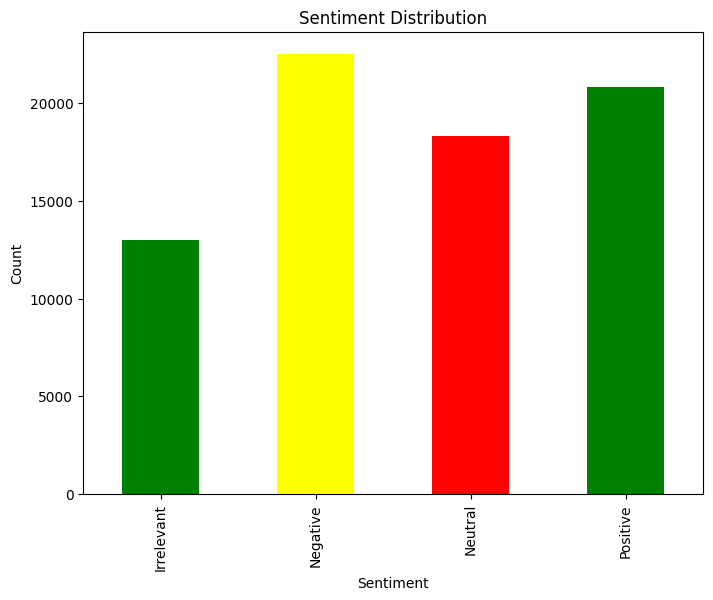

In [10]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df.groupby('Sentiment')['ID'].count().plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

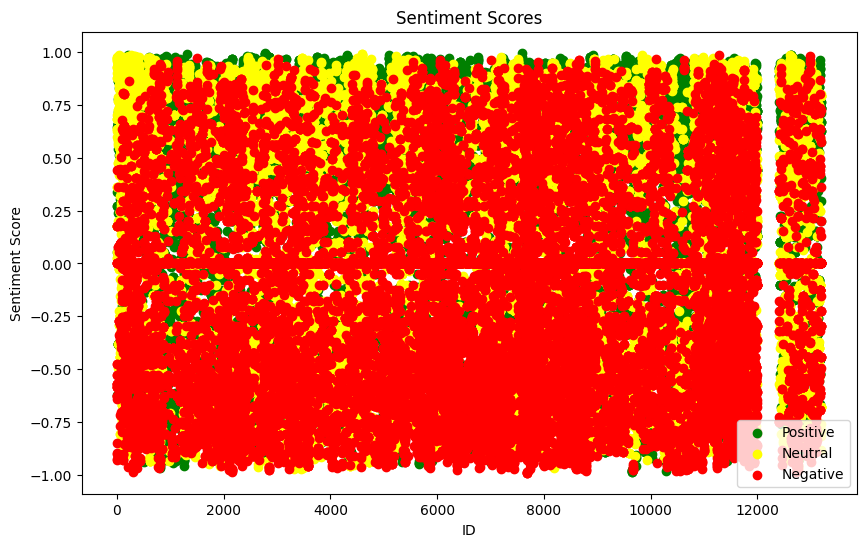

In [11]:
# Visualize sentiment scores
plt.figure(figsize=(10, 6))
for sentiment, color in zip(['Positive', 'Neutral', 'Negative'], ['green', 'yellow', 'red']):
    subset = df[df['Sentiment'] == sentiment]
    plt.scatter(subset['ID'], subset['SentimentScore'], label=sentiment, color=color)

plt.title('Sentiment Scores')
plt.xlabel('ID')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()